In [1]:
import json
import numpy as np


In [27]:
with open('test_with_acc.train.json') as json_file:
    data = json.load(json_file)

with open('test.train_imperf.json') as json_file_2:
    data_2 = json.load(json_file_2)
#     for p in data['people']:
#         print('Name: ' + p['name'])
#         print('Website: ' + p['website'])
#         print('From: ' + p['from'])
#         print('')

In [4]:
data[0].keys()

dict_keys(['boundaries', 'neighborhood', 'reached', 'target_location', 'start_location', 'landmarks', 'dialog'])

In [5]:
data[0]['landmarks']


[{'y': 0, 'name': 'TD Bank', 'x': 0, 'type': 'Bank', 'orientation': 'NE'},
 {'y': 1, 'name': 'Citi Bank', 'x': 0, 'type': 'Bank', 'orientation': 'NE'},
 {'y': 1, 'name': 'TD Bank', 'x': 0, 'type': 'Bank', 'orientation': 'SE'},
 {'y': 1,
  'name': 'The Capital Grille',
  'x': 1,
  'type': 'Restaurant',
  'orientation': 'SW'},
 {'y': 0, 'name': '..', 'x': 1, 'type': 'Subway', 'orientation': 'SE'}]

In [6]:
data[100]['reached']

True

In [7]:
correct = {}
incorrect = {}

for d in data:
    if d['reached']:
        for d_ in d['landmarks']:
            k = d_['name']
#             k = d_['type']
            if k in correct.keys():
                correct[k] += 1
            else:
                correct[k] = 1
    else:
        for d_ in d['landmarks']:
            k = d_['name']
            if k in incorrect.keys():
                incorrect[k] += 1
            else:
                incorrect[k] = 1

        
                

In [8]:
correct.keys()

dict_keys(['TD Bank', 'Citi Bank', 'The Capital Grille', '..', 'I <3 NY', 'Bank of America', 'Starbucks', 'Bailey', 'Cafe Wall st', '?', 'Liquor', 'Chipotle', '...', 'Depaneur', 'The Shade Store', 'G-Star raw', '', 'Levee', 'Van Leeuwen', 'ID', 'Dental arts', 'Rituals', 'Chai Tai Kitchen', 'Fish', 'Fat Goose', 'Peter Doelcers', 'Greek', 'Brooklyn Ale', 'Cafe Colette', 'Miranda', 'HSBC', 'Whole Foods', 'SpaceNK', 'Norbu', 'Pizza', 'Pinkyotto', 'Senko Funeral Home', 'Fabianes', 'Uva', 'Brooklyn ..', 'Manhattan Muffins', 'Dunkin Donuts', 'Flower shop', 'Deli', 'Bedford Fruits and Vegetables', 'Sweet Chick', 'Clothing store', "Kasia's Restaurant", 'Medical Office', 'Ale House', 'Real Estate', 'Dental Office', 'Crif Dogs', 'Liquor Store', 'Bufalo', 'Pharmacy', 'Ici', 'Fushimi', 'Gourmet Deli', 'The Bean', 'Gringer', 'Lanudry', 'Spiegel', 'Cleaners', 'La Contrada', 'Coopers', 'Healthy', 'Moonstruck', 'Rite Aid', 'Empty', 'Bicycle', 'Prescription center', 'Flower', 'Misc', 'Santander', 'Liquo

In [9]:
correct_generic = correct['..'] +correct['...'] +correct['?'] 
correct_specific = sum(correct.values())- correct_generic

incorrect_generic = incorrect['..'] +incorrect['...'] +incorrect['?'] 
incorrect_specific = sum(incorrect.values())- incorrect_generic

spec_perc = correct_specific/(incorrect_specific+correct_specific)
gen_perc = correct_generic/(correct_generic+incorrect_generic)
print(gen_perc, spec_perc)

corr_perc = correct_specific/(correct_specific+correct_generic)
incorr_perc = incorrect_specific/(incorrect_specific+incorrect_generic)
print(corr_perc, incorr_perc)

0.25 0.23393924302788843
0.8670973696354407 0.8768704574604532


In [10]:
a = [correct_generic, incorrect_generic ] #gen
b = [correct_specific, incorrect_specific] #spec

from matplotlib import pyplot as plt
import numpy as np
import matplotlib
x = np.arange(2)  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, a, width, label='Generic')
rects2 = ax.bar(x + width/2, b, width, label='Specific')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels([0,1])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.grid()
plt.xlabel('Length of the path')
plt.ylabel('Accuracy')
plt.title('Accuracy vs length of the path')
font = {'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
plt.show()

<Figure size 2000x1000 with 1 Axes>

In [28]:
correct_2 = {}
incorrect_2 = {}

for d in data:
    if d['reached']:
        for d_ in d['landmarks']:
            k = d_['type']
            if k in correct_2.keys():
                correct_2[k] += 1
            else:
                correct_2[k] = 1
    else:
        for d_ in d['landmarks']:
            k = d_['type']
            if k in incorrect_2.keys():
                incorrect_2[k] += 1
            else:
                incorrect_2[k] = 1
                
                
                
correct_2_2 = {}
incorrect_2_2 = {}

for d in data_2:
    if d['reached']:
        for d_ in d['landmarks']:
            k = d_['type']
            if k in correct_2_2.keys():
                correct_2_2[k] += 1
            else:
                correct_2_2[k] = 1
    else:
        for d_ in d['landmarks']:
            k = d_['type']
            if k in incorrect_2_2.keys():
                incorrect_2_2[k] += 1
            else:
                incorrect_2_2[k] = 1

In [29]:
types = list(correct_2.keys())
types

['Bank',
 'Restaurant',
 'Subway',
 'Shop',
 'Coffee Shop',
 'Bar',
 'Playfield',
 'Theater',
 'Hotel']

In [32]:
a = []
b = []
p = []
for t in types:
    a.append(correct_2[t])
    b.append(incorrect_2[t])
    p.append(correct_2[t]/(correct_2[t]+incorrect_2[t]))
    

myorder = [3, 1, 4, 0, 2, 5, 8, 7, 6]
a = [a[i] for i in myorder]
b = [b[i] for i in myorder]
p = [p[i] for i in myorder]



a_2 = []
b_2 = []
p_2 = []
for t in types:
    a_2.append(correct_2_2[t])
    b_2.append(incorrect_2_2[t])
    p_2.append(correct_2_2[t]/(correct_2_2[t]+incorrect_2_2[t]))
    

myorder = [3, 1, 4, 0, 2, 5, 8, 7, 6]
a_2 = [a_2[i] for i in myorder]
b_2 = [b_2[i] for i in myorder]
p_2 = [p_2[i] for i in myorder]


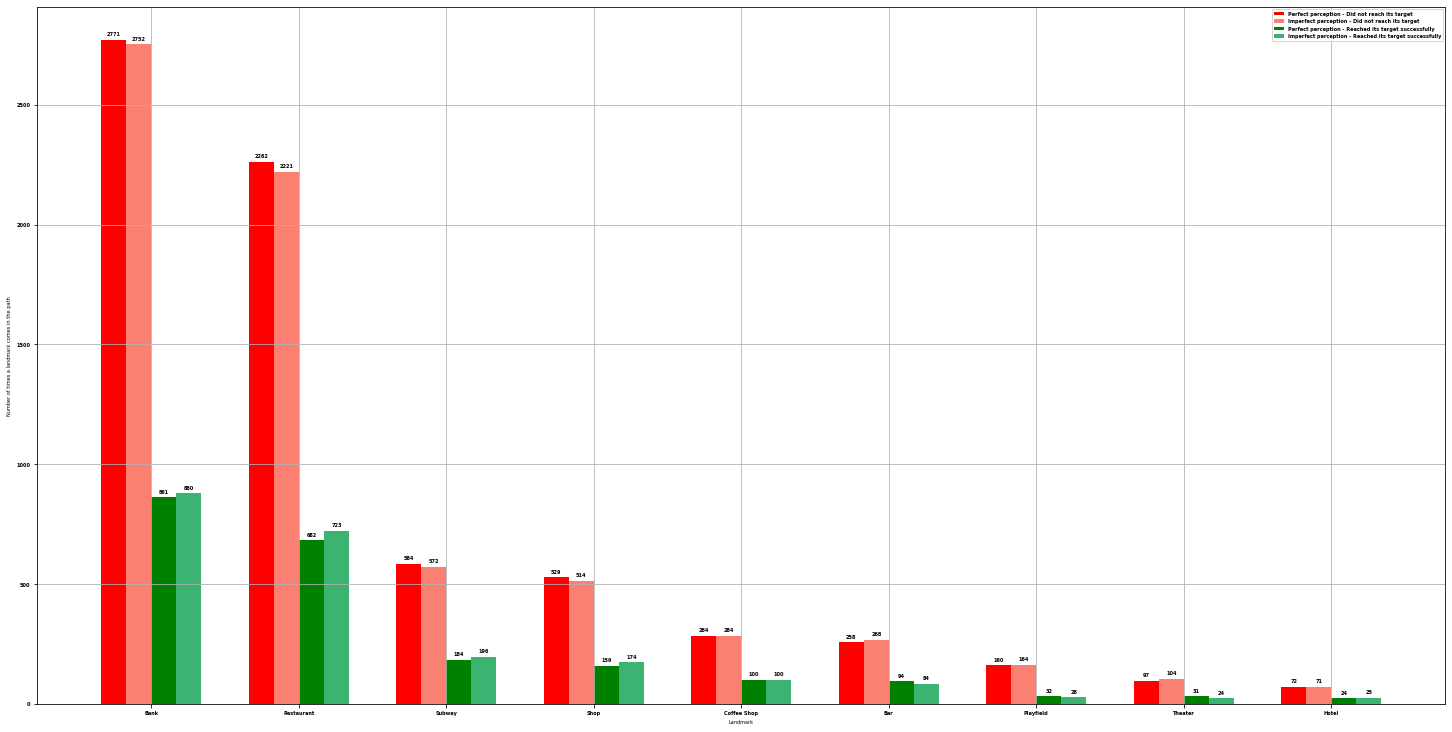

2167 7017
2234 6950


In [36]:


from matplotlib import pyplot as plt
import numpy as np
import matplotlib
x = np.arange(len(a))  # the label locations
width = 0.17  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
# rects1 = ax.bar(x - width*7/2, a[0], width, label='Bank')
# rects2 = ax.bar(x - width*5/2, a[1], width, label='Shop')
# rects1 = ax.bar(x - width*3/2, a[2], width, label='Subway')
rects2 = ax.bar(x - 3*width/2, b, width, label='Perfect perception - Did not reach its target', color='r')
rects1 = ax.bar(x - width/2, b_2, width, label='Imperfect perception - Did not reach its target', color='salmon')
rects3 = ax.bar(x + width/2, a, width, label='Perfect perception - Reached its target successfully', color='g')
rects4 = ax.bar(x + 3*width/2, a_2, width, label='Imperfect perception - Reached its target successfully', color='mediumseagreen')
# rects2 = ax.bar(x + width*3/2, a[5], width, label='Hotel')
# rects1 = ax.bar(x + width*5/2, a[6], width, label='Playfield')
# rects2 = ax.bar(x + width*7/2, a[7], width, label='Bar')

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.legend()



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.grid()
plt.xlabel('Landmark')
plt.ylabel('Number of times a landmark comes in the path')
# plt.title('Contribution of each landmark in')
font = {'weight' : 'bold',
        'size'   : 5}

matplotlib.rc('font', **font)
plt.show()

print(sum(a),sum(b))
print(sum(a_2),sum(b_2))

In [169]:

utt = []
for d in data[0]['dialog']:
    k = d['text']
    if d['id'] == 'Tourist' and d['text'][0] != 'A':
        utt.append(k+'\n')
        
with open('tourist_utterances.txt','w') as f:
    f.writelines(utt)
            
    